Explain what is the Double Lasso Approach in a markdown cell. Use equations for a better explanation.

## Double Lasso - Testing the Convergence Hypothesis

### Introduction

We provide an additional empirical example of partialling-out with Lasso to estimate the regression coefficient $\beta_1$ in the high-dimensional linear regression model:
  $$
  Y = \beta_1 D +  \beta_2'W + \epsilon.
  $$
  
Specifically, we are interested in how the rates  at which economies of different countries grow ($Y$) are related to the initial wealth levels in each country ($D$) controlling for country's institutional, educational, and other similar characteristics ($W$).
  
The relationship is captured by $\beta_1$, the *speed of convergence/divergence*, which measures the speed at which poor countries catch up $(\beta_1< 0)$ or fall behind $(\beta_1> 0)$ rich countries, after controlling for $W$. Our inference question here is: do poor countries grow faster than rich countries, controlling for educational and other characteristics? In other words, is the speed of convergence negative: $ \beta_1 <0?$ This is the Convergence Hypothesis predicted by the Solow Growth Model. This is a structural economic model. Under some strong assumptions, that we won't state here, the predictive exercise we are doing here can be given causal interpretation.

The outcome $Y$ is the realized annual growth rate of a country's wealth  (Gross Domestic Product per capita). The target regressor ($D$) is the initial level of the country's wealth. The target parameter $\beta_1$ is the speed of convergence, which measures the speed at which poor countries catch up with rich countries. The controls ($W$) include measures of education levels, quality of institutions, trade openness, and political stability in the country.

### Data analysis

We consider the data set GrowthData which is included in the package hdm. First, let us load the data set to get familiar with the data.

In [1]:
library(hdm)
library(xtable)

In [2]:
# Export data to read in python
GrowthData <- GrowthData
save(GrowthData, file = "../../data/GrowthData.RData")

In [3]:
head(GrowthData)

,Outcome,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65,...,seccf65,syr65,syrm65,syrf65,teapri65,teasec65,ex1,im1,xr65,tot1
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.02433575,1,6.591674,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29,...,0.04,0.033,0.057,0.010,47.6,17.3,0.0729,0.0667,0.348,-0.014727
2,0.10047257,1,6.829794,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91,...,0.64,0.173,0.274,0.067,57.1,18.0,0.0940,0.1438,0.525,0.005750
3,0.06705148,1,8.895082,0.0000,0.204244,0.009186,0.260,0.325,0.201,1.00,...,18.14,2.573,2.478,2.667,26.5,20.7,0.1741,0.1750,1.082,-0.010040
4,0.06408917,1,7.565275,0.1997,0.248714,0.036270,0.061,0.070,0.051,1.00,...,2.63,0.438,0.453,0.424,27.8,22.7,0.1265,0.1496,6.625,-0.002195
5,0.02792955,1,7.162397,0.1740,0.299252,0.037367,0.017,0.027,0.007,0.82,...,2.11,0.257,0.287,0.229,34.5,17.6,0.1211,0.1308,2.500,0.003283
6,0.04640744,1,7.218910,0.0000,0.258865,0.020880,0.023,0.038,0.006,0.50,...,1.46,0.160,0.174,0.146,34.3,8.1,0.0634,0.0762,1.000,-0.001747


In [4]:
growth <- GrowthData
attach(growth)
names(growth)

[1] "Outcome"   "intercept" "gdpsh465"  "bmp1l"     "freeop"    "freetar"  
 [7] "h65"       "hm65"      "hf65"      "p65"       "pm65"      "pf65"     
[13] "s65"       "sm65"      "sf65"      "fert65"    "mort65"    "lifee065" 
[19] "gpop1"     "fert1"     "mort1"     "invsh41"   "geetot1"   "geerec1"  
[25] "gde1"      "govwb1"    "govsh41"   "gvxdxe41"  "high65"    "highm65"  
[31] "highf65"   "highc65"   "highcm65"  "highcf65"  "human65"   "humanm65" 
[37] "humanf65"  "hyr65"     "hyrm65"    "hyrf65"    "no65"      "nom65"    
[43] "nof65"     "pinstab1"  "pop65"     "worker65"  "pop1565"   "pop6565"  
[49] "sec65"     "secm65"    "secf65"    "secc65"    "seccm65"   "seccf65"  
[55] "syr65"     "syrm65"    "syrf65"    "teapri65"  "teasec65"  "ex1"      
[61] "im1"       "xr65"      "tot1"

In [5]:
dim(growth)

[1] 90 63

### Methods

The sample contains $90$ countries and $63$ controls. Thus $p \approx 60$, $n=90$ and $p/n$ is not small. We expect the least squares method to provide a poor estimate of $\beta_1$.  We expect the method based on partialling-out with Lasso to provide a high quality estimate of $\beta_1$.

To check this hypothesis, we analyze the relation between the output variable $Y$ and the other country's characteristics by running a linear regression in the first step.

**1. OLS**

In [6]:
reg.ols <- lm(Outcome~.-1,data=growth)
summary(reg.ols)


Call:
lm(formula = Outcome ~ . - 1, data = growth)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040338 -0.011298 -0.000863  0.011813  0.043247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
intercept  2.472e-01  7.845e-01   0.315  0.75506   
gdpsh465  -9.378e-03  2.989e-02  -0.314  0.75602   
bmp1l     -6.886e-02  3.253e-02  -2.117  0.04329 * 
freeop     8.007e-02  2.079e-01   0.385  0.70300   
freetar   -4.890e-01  4.182e-01  -1.169  0.25214   
h65       -2.362e+00  8.573e-01  -2.755  0.01019 * 
hm65       7.071e-01  5.231e-01   1.352  0.18729   
hf65       1.693e+00  5.032e-01   3.365  0.00223 **
p65        2.655e-01  1.643e-01   1.616  0.11727   
pm65       1.370e-01  1.512e-01   0.906  0.37284   
pf65      -3.313e-01  1.651e-01  -2.006  0.05458 . 
s65        3.908e-02  1.855e-01   0.211  0.83469   
sm65      -3.067e-02  1.168e-01  -0.263  0.79479   
sf65      -1.799e-01  1.181e-01  -1.523  0.13886   
fert65     6.881e-03  2.705e-02   0.254

In [7]:
est_ols <- summary(reg.ols)$coef["gdpsh465",1]
# output: estimated regression coefficient corresponding to the target regressor

std_ols <- summary(reg.ols)$coef["gdpsh465",2]
# output: std. error

ci_ols <- confint(reg.ols)[2,]
# output: 95% confidence interval

results_ols <- as.data.frame(cbind(est_ols,std_ols,ci_ols[1],ci_ols[2]))
colnames(results_ols) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(results_ols) <-c("OLS")

In [8]:
print(est_ols)
print(std_ols)
print(ci_ols)

[1] -0.009377989
[1] 0.02988773
      2.5 %      97.5 % 
-0.07060022  0.05184424 


Partialling out

In [9]:
y = growth[,-c(3)]
d = growth[,-c(1)]

resY <- summary(lm(Outcome~.-1,data=y))$residuals
resD <-summary(lm(gdpsh465~.-1,data=d))$residuals

residuos <- data.frame(resY,resD)
ols <- lm(resY~resD,data=residuos)
part_out.ols <- summary(ols)

In [10]:
est_ols1 <- part_out.ols$coef["resD",1]
std_ols1 <- part_out.ols$coef["resD",2]
ci_ols1 <- confint(lm(resY~resD,data=residuos))[2,]


In [11]:
table <- matrix(0,2,4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
table[2,1:4]   <- c(est_ols1,std_ols1,ci_ols1[1],ci_ols1[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS","OLS - part out")
tab <- xtable(table, digits = 3) 
tab

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.02988773,-0.07060022,0.05184424
OLS - part out,-0.009377989,0.01685895,-0.04288161,0.02412563


**2. Double LASSO using cross Validation**

In [12]:
Y <- as.matrix(growth[, 1, drop = F]) # output variable
W <- as.matrix(growth)[, -c(1, 2,3)] # controls
D <- as.matrix(growth[, 3, drop = F]) # target regressor

In [13]:
#install.packages("glmnet")
library("glmnet")

Loading required package: Matrix

Loaded glmnet 4.1-4



In [14]:
resY <- Y - predict(cv.glmnet(W, Y),newx=W)
resD <- Y - predict(cv.glmnet(W, D),newx=W)

residuos <- data.frame(resY,resD)
cross.lasso <- lm(resY~resD,data=residuos)
part_out_cross.lasso <- summary(cross.lasso)

In [15]:
est_lasso <- part_out_cross.lasso$coef["resD",1]
std_lasso <- part_out_cross.lasso$coef["resD",2]
ci_lasso <- confint(lm(resY~resD,data=residuos))[2,]

In [16]:
table <- matrix(0,1,4)
table[1,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso - Cross Validation")
tab <- xtable(table, digits = 3) 
tab

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
Double Lasso - Cross Validation,0.00118258,0.003131259,-0.005040139,0.007405299


**3. Double Lasso using theoretical Lambda**

In [17]:
resY <- rlasso(W,Y)$res
resD <- rlasso(W,D)$res


residuos <- data.frame(resY,resD)
theoretical.lasso <- lm(resY~resD,data=residuos)
part_out_theoretical.lasso <- summary(theoretical.lasso)

In [18]:
est_lasso1 <- part_out_theoretical.lasso$coef["resD",1]
std_lasso1 <- part_out_theoretical.lasso$coef["resD",2]
ci_lasso1 <- confint(lm(resY~resD,data=residuos))[2,]

In [19]:
table <- matrix(0,1,4)
table[1,1:4]   <- c(est_lasso1,std_lasso1,ci_lasso1[1],ci_lasso1[2])
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso - Theoretical Lambda")
tab <- xtable(table, digits = 3) 
tab

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
Double Lasso - Theoretical Lambda,-0.04981147,0.01393636,-0.07750705,-0.02211588


**4. Double Lasso using method="partialling out"**

In [20]:
part_out_direct.lasso <- rlassoEffect(x = W, y = Y, d = D, method = "partialling out")

est_lasso2 <- summary(part_out_direct.lasso)$coef[,1]
std_lasso2 <- summary(part_out_direct.lasso)$coef[,2]
lower_ci_lasso2 <- est_lasso2 - 1.96*std_lasso2
upper_ci_lasso2 <- est_lasso2 + 1.96*std_lasso2

In [21]:
table <- matrix(0,1,4)
table[1,1:4]   <- c(est_lasso2,std_lasso2,lower_ci_lasso2,upper_ci_lasso2)
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("Double Lasso - Direct")
tab <- xtable(table, digits = 3) 
tab

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
Double Lasso - Direct,-0.04981147,0.01393636,-0.07712673,-0.0224962


**Method summary**

In [22]:
table <- matrix(0,4,4)
table[1,1:4]   <- c(est_ols,std_ols,ci_ols[1],ci_ols[2])
table[2,1:4]   <- c(est_lasso,std_lasso,ci_lasso[1],ci_lasso[2])
table[3,1:4]   <- c(est_lasso1,std_lasso1,ci_lasso1[1],ci_lasso1[2])
table[4,1:4]   <- c(est_lasso2,std_lasso2,lower_ci_lasso2,upper_ci_lasso2)
colnames(table) <-c("estimator","standard error", "lower bound CI", "upper bound CI")
rownames(table) <-c("OLS","Double Lasso - Cross Validation","Double Lasso - Theoretical Lambda","Double Lasso - Direct")
tab <- xtable(table, digits = 3) 
tab

,estimator,standard error,lower bound CI,upper bound CI
,<dbl>,<dbl>,<dbl>,<dbl>
OLS,-0.009377989,0.029887726,-0.070600221,0.051844243
Double Lasso - Cross Validation,0.001182580,0.003131259,-0.005040139,0.007405299
Double Lasso - Theoretical Lambda,-0.049811465,0.013936358,-0.077507049,-0.022115881
Double Lasso - Direct,-0.049811465,0.013936358,-0.077126728,-0.022496203


### Coefficient Plot

In [23]:
#nstall.packages("arm")
library("arm")

Loading required package: MASS

Loading required package: lme4


arm (Version 1.12-2, built: 2021-10-15)


Working directory is C:/Users/Esteban/Documents/GitHub/ECO224/Labs/replication_4



Attaching package: 'arm'


The following object is masked from 'package:xtable':

    display




Warning message in plot.window(...):
""keep" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""keep" is not a graphical parameter"
Warning message in title(...):
""keep" is not a graphical parameter"
Warning message in plot.window(...):
""keep" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""keep" is not a graphical parameter"
Warning message in title(...):
""keep" is not a graphical parameter"


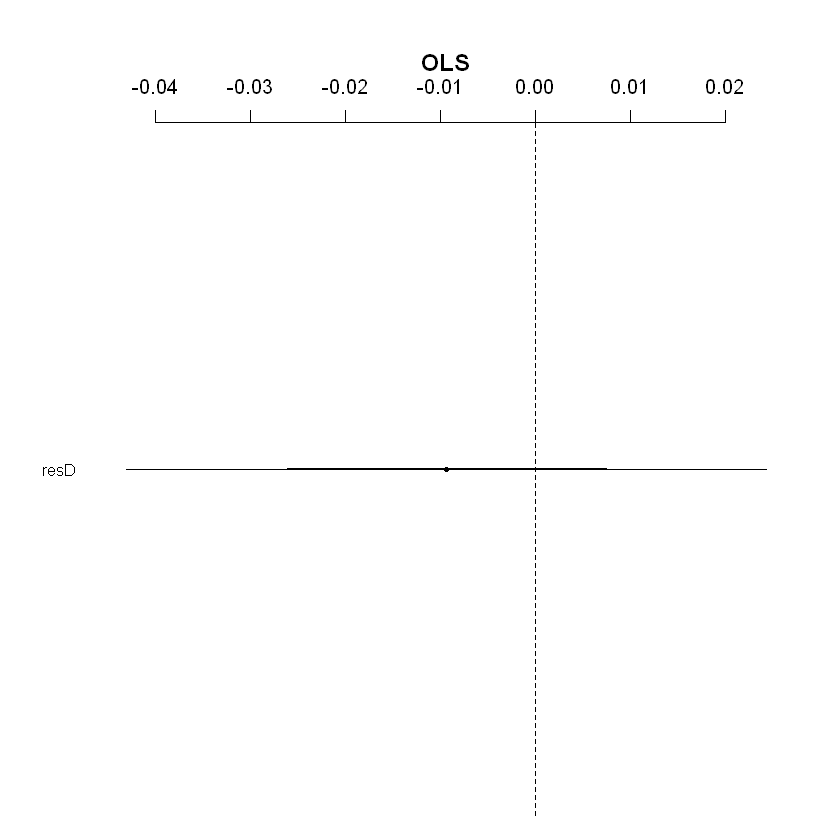

Warning message in plot.window(...):
""keep" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""keep" is not a graphical parameter"
Warning message in title(...):
""keep" is not a graphical parameter"


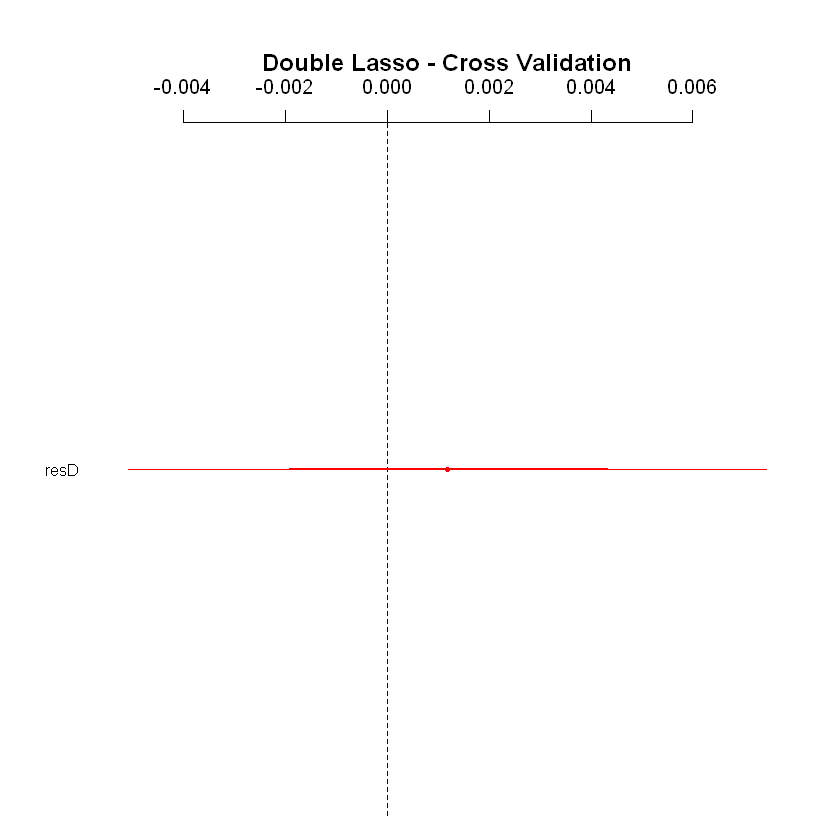

Warning message in plot.window(...):
""ci_low" is not a graphical parameter"
Warning message in plot.window(...):
""ci_high" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""ci_low" is not a graphical parameter"
Warning message in plot.xy(xy, type, ...):
""ci_high" is not a graphical parameter"
Warning message in title(...):
""ci_low" is not a graphical parameter"
Warning message in title(...):
""ci_high" is not a graphical parameter"


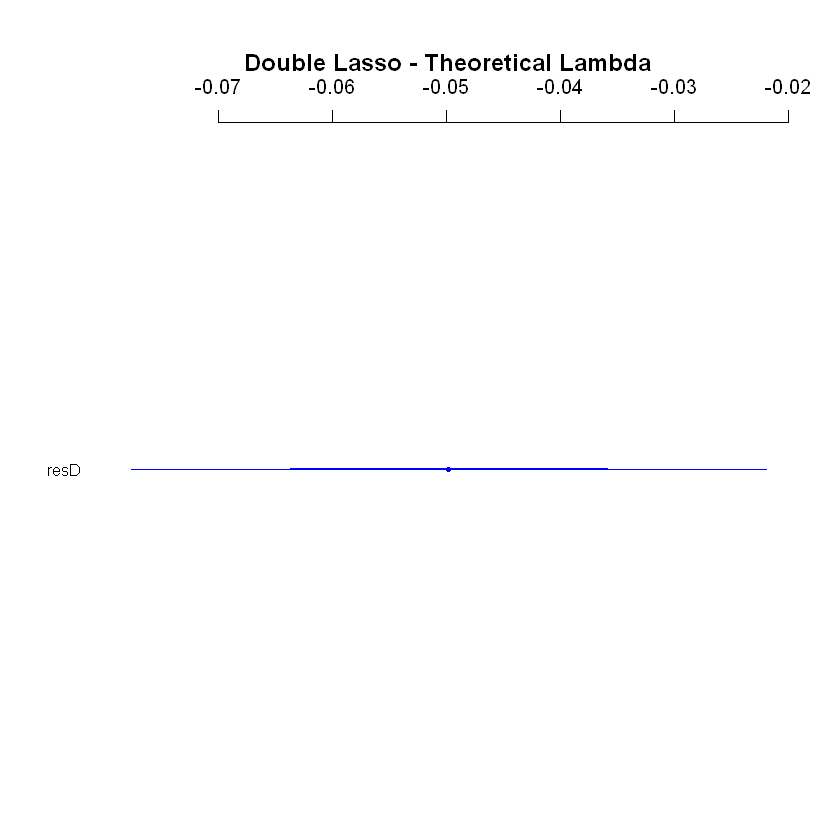

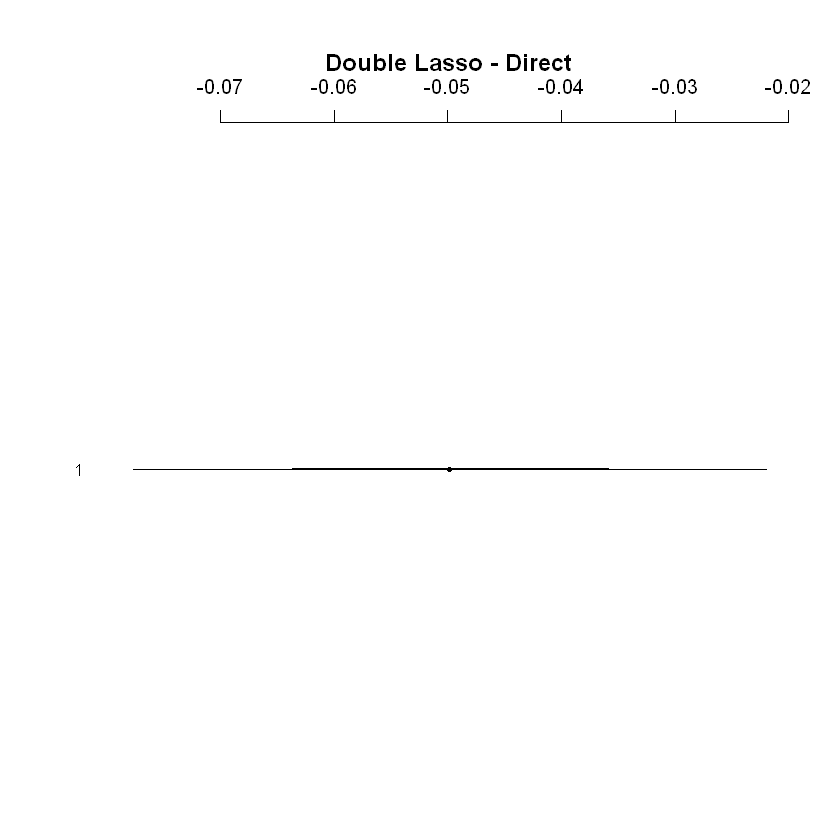

In [60]:
#source("https://www.r-statistics.com/wp-content/uploads/2010/07/coefplot.r.txt")

coefplot(ols, keep = "!Intercept",main="OLS")
coefplot(cross.lasso, col.pts="red", keep = "!Intercept",main="Double Lasso - Cross Validation")
coefplot(theoretical.lasso, col.pts="blue", keep = "!Intercept",main="Double Lasso - Theoretical Lambda")
coefplot(est_lasso2,sd=std_lasso2, ci_low=lower_ci_lasso2, ci_high =upper_ci_lasso2,main="Double Lasso - Direct")